#1.	Plot the data points using the first two dimensions (Sepal Length and Sepal Width).

In [ ]:
#load iris dataset

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#download and load dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target

#get sepal length and sepal width
sep_len = data [:,0]
sep_wid = data [:,1]

#normalize data around origin
sep_len -= np.mean(sep_len)
sep_wid -= np.mean(sep_wid)

sep_len_mean = np.mean ( sep_len )
sep_wid_mean = np.mean ( sep_wid )

In [ ]:
# sep_len.shape

a = np.vstack((sep_len, sep_wid)).T
print('a:', a.shape)

v = np.array([-2.75, 2.75])
print('v:', v.shape)

aTv = np.matmul (a,v)
print('aTv:', aTv.shape)

vTv = np.dot (v,v)
print('vTv:', vTv.shape)

proj = aTv / vTv
print('aTv/vTv:', proj.shape)

proj = (proj * v[:, None]).T  #check this indexing 2hrs before viva!
print('(aTv/vTv) * v:', proj.shape)

print(proj.shape)

a: (150, 2)
v: (2,)
aTv: (150,)
vTv: ()
aTv/vTv: (150,)
(aTv/vTv) * v: (150, 2)
(150, 2)


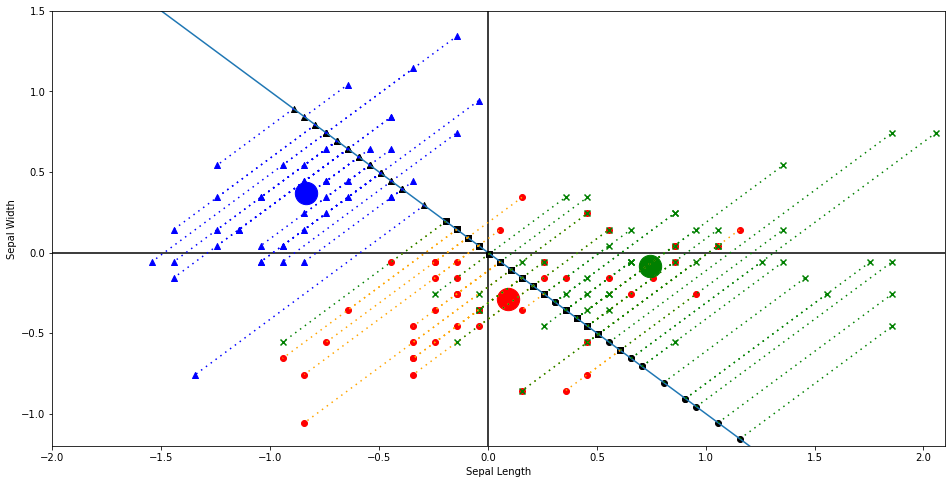

In [ ]:
# plot datapoints using the first two dimensions
plt.figure(figsize = (16,8))

# plot downward pointing line
x = np.linspace (-1.8, 2.5, 30)
y = np.linspace (1.5, -2.0, 30)

#set x-limits according to min and max of sep len
line_x2 = np.linspace(-1.7, 2.3, 20)
line_x1 = -1.0*line_x2
plt.plot(line_x2,line_x1)

#axis spine
plt.axvline(0, color='black')
plt.axhline(0, color='black')

#plotting each datapoint
plt.scatter (sep_len[target==0], sep_wid[target==0], color='b', marker = '^')
plt.scatter (sep_len[target==1], sep_wid[target==1], color='r', marker = 'o')
plt.scatter (sep_len[target==2], sep_wid[target==2], color='g', marker = 'x')

#plotting mean (big circles)
plt.scatter ( np.mean( sep_len[target==0] ) , np.mean( sep_wid[target==0] ) , color='b', marker = 'o', s=500)
plt.scatter ( np.mean( sep_len[target==1] ) , np.mean( sep_wid[target==1] ) , color='r', marker = 'o', s=500)
plt.scatter ( np.mean( sep_len[target==2] ) , np.mean( sep_wid[target==2] ) , color='g', marker = 'o', s=500)

#plotting projections (careful: check indexing syntax!)
plt.scatter(proj[:, 0][target==0], proj[:, 1][target==0], marker='^', color='black')
plt.scatter(proj[:, 0][target==1], proj[:, 1][target==1], marker=',', color='black')
plt.scatter(proj[:, 0][target==2], proj[:, 1][target==2], marker='o', color='black')


for (p, sl, sw) in zip(proj[target==0], sep_len[target==0], sep_wid[target==0]):
  plt.plot([p[0], sl], [p[1], sw],linestyle='--', c='b', dashes=(1, 3))

for (p, sl, sw) in zip(proj[target==1], sep_len[target==1], sep_wid[target==1]):
  plt.plot([p[0], sl], [p[1], sw],linestyle='--', c='orange', dashes=(1, 3))

for (p, sl, sw) in zip(proj[target==2], sep_len[target==2], sep_wid[target==2]):
  plt.plot([p[0], sl], [p[1], sw],linestyle='--', c='g', dashes=(1, 3))

plt.xlim(-2.0, 2.1)
plt.ylim(-1.2, 1.5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


#6. Draw the normal distribution function for all the sepal length (X1) . 
##To do that, first calculate sample mean(µ 1 ) and sample variance.

## Then, normalize all datapoints.
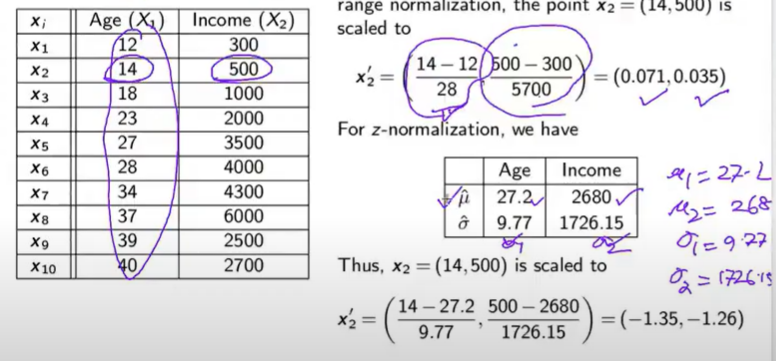


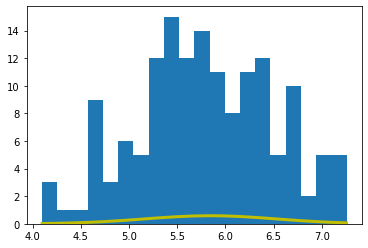

In [ ]:
import numpy as np
import statistics as stat
from scipy.stats import norm
import matplotlib.pyplot as plt

# # RANGE NORMALIZATION
# # sepal_lengths_r_norm = (sepal_lengths - sepal_lengths.min())/ (sepal_lengths.max() - sepal_lengths.min())
# # show before and after:
# #for i in range (150):
#   #print(sepal_lengths[i], sepal_lengths_r_norm[i])

# # STANDARD SCORE NORMALIZATION
# sepal_lengths_z_norm = []


# for i in range(150):
#   sepal_lengths_z_norm.append(( sepal_lengths[i] - sample_mean ) / sample_variance)

# #print(sepal_lengths_z_norm)

# print('before z-normalization:', sepal_lengths[0])
# print('before z-normalization:', sepal_lengths_z_norm[0])




sepal_lengths = np.array (sepal_lengths)
sepal_lengths = sepal_lengths.astype(float)

# # calc mean
# sample_mean = np.mean (sepal_lengths)





# # sample_variance = stat.variance (sepal_lengths)

# #USAGE:
#   #s = np.random.normal(mu, sigma, 1000)
#   #count, bins, ignored = plt.hist(s, 20, normed=True)

sample_mean = np.mean(sepal_lengths)

# # calc variance
demeaned_vector = np.subtract (sepal_lengths, sample_mean)
squared = np.square(demeaned_vector)
sample_variance = sum ( squared ) / 150


mu = sample_mean
sigma = sample_variance

s = np.random.normal(mu, sigma, 150)

count, bins, ignored = plt.hist(s, 20)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
  np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()







# MATHEMATICAL APPROACH



# setting up the coordinates for the plot


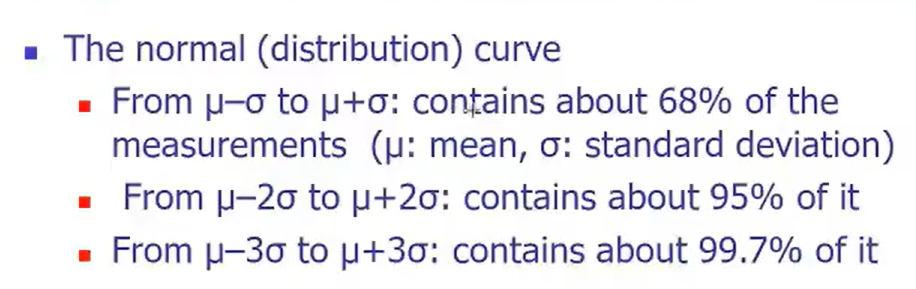

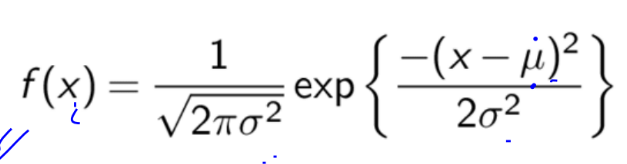

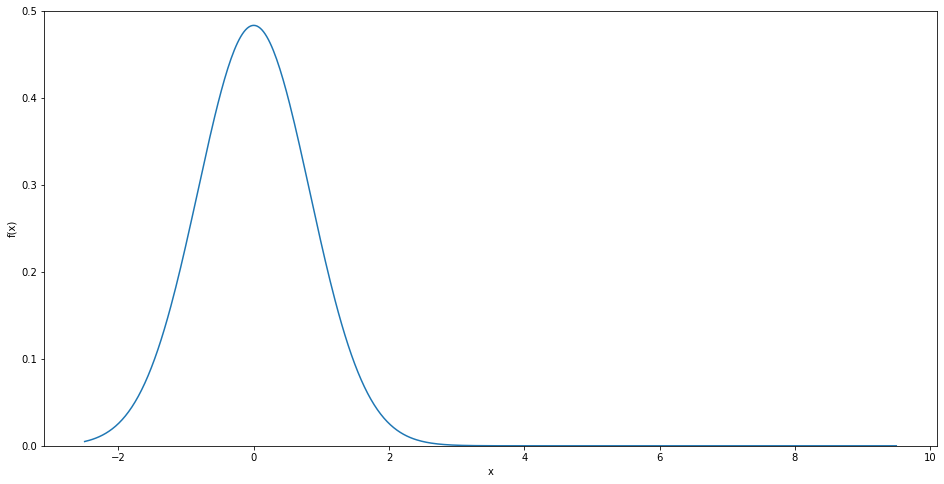

In [ ]:
#take sepal length again, without normalization
sep_len = data[:, 0]
mean = np.mean(sep_len)
var = np.var(sep_len)

x = np.linspace(-2.5, 9.5, 500)
f_x = (1/np.sqrt(2*np.pi*var))*np.exp(-((x-mean)**2)/(2*var))

plt.figure(figsize=(16, 8)) 

plt.plot(x, f_x)
# plt.plot([mean, mean], [0, (1/np.sqrt(2*np.pi*var))], c='gray')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(0.0, 0.5)
plt.show()

In [ ]:
# def covariance(x, y):
#     # Finding the mean of the series x and y
#     mean_x = sum(x)/float(len(x))
#     mean_y = sum(y)/float(len(y))
#     # Subtracting mean from the individual elements
#     sub_x = [i - mean_x for i in x]
#     sub_y = [i - mean_y for i in y]
#     numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
#     denominator = len(x)-1
#     cov = numerator/denominator
#     return cov


# import numpy as np



# #get sepal lengths and sepal widths 
# i = 0

# print(sepal_lengths)
# # for line in lines:
# #   sepal_lengths[i]=  ( float( line[0]) )
# #   sepal_widths[i] =( float( line[1]) )
# #   i+=1

# # computing µ1 and µ2
# sepal_widths_mean = np.mean(  (sepal_widths) )
# sepal_lengths_mean = np.mean(  (sepal_lengths) )

# # computing covariance matrix
# #let, 0 = length
# #let, 1 = width
# covmat = np.ndarray (shape = [2,2])

# # covmat(0,0) = cov(lengths,lengths)
# # covmat(0,1) = cov(lengths,widths)
# # covmat(1,0) = cov(widths,length)
# # covmat(1,1) = cov(widths,widths)

# # therefore, covmat (0,0) = variance (lengths)
# covmat[0][0] = np.var(sepal_lengths)
# covmat[1][1] = np.var(sepal_widths)

# # therefore, covmat (1,1) = variance (widths)
# # and, covmat (1,0) and covmat (0,1) have same value because covariance is commutative.
# covmat[1][0] = covariance (sepal_lengths,sepal_widths)
# covmat[0][1] = covariance (sepal_lengths,sepal_widths)

# #correlation coefficient between X1 and X2
# cor = np.corrcoef (sepal_lengths, sepal_widths)


#Part 2: Numerical Analysis (Magic04 Dataset)

## 1. Compute the multivariate mean vector

In [ ]:
#load dataset
import numpy as np
f3 = open ('magic04.data')
f3 = f3.readlines()

n = len(f3)

lines = []
for line in f3:
  this_string = str(line)
  lines.append( this_string.split(',') )

lines = np.array(lines)

lines = lines[:,:10]
lines = lines.astype(float)

multivariate_mean_vector = np.zeros ((1,10))
multivariate_mean_vector = np.add( np.mean(lines[:, :10], axis=0),  multivariate_mean_vector ) 



In [ ]:
np.shape(lines)

(19020, 10)

In [ ]:
# print(multivariate_mean_vector.shape)

#miu matrix
multivariate_means_column = np.array ( [[np.mean(lines[:, :10], axis=0)] for _ in range (n) ] )
# multivariate_means_column.shape


In [ ]:
multivariate_means_column = np.reshape ( multivariate_means_column, (19020, 10) )

# print(np.shape(multivariate_means_column))
print(lines.shape)

print(multivariate_means_column[30])

(19020, 10)
(19020, 10)
[ 53.25015393  22.18096622   2.82501696   0.38032707   0.21465713
  -4.33174516  10.54554482   0.24972596  27.64570668 193.81802647]


In [ ]:
# CENTERED DATA MATRIX CALC

Z = lines - multivariate_means_column

print(np.shape(Z))
print(multivariate_means_column)


(19020, 10)
[[ 53.25015393  22.18096622   2.82501696 ...   0.24972596  27.64570668
  193.81802647]
 [ 53.25015393  22.18096622   2.82501696 ...   0.24972596  27.64570668
  193.81802647]
 [ 53.25015393  22.18096622   2.82501696 ...   0.24972596  27.64570668
  193.81802647]
 ...
 [ 53.25015393  22.18096622   2.82501696 ...   0.24972596  27.64570668
  193.81802647]
 [ 53.25015393  22.18096622   2.82501696 ...   0.24972596  27.64570668
  193.81802647]
 [ 53.25015393  22.18096622   2.82501696 ...   0.24972596  27.64570668
  193.81802647]]


# COVMAT as inner product

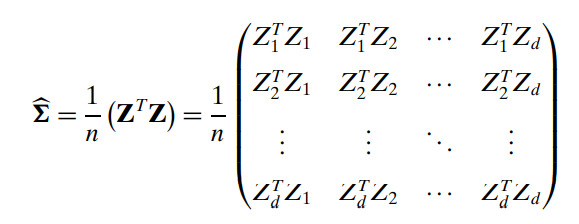

In [ ]:
Z

covmat = (1/n) * ( np.matmul(Z.T,Z)  )

covmat.shape

(10, 10)

# COVMAT as outer product of each centered point:
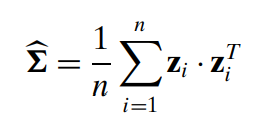

In [ ]:
covmat_2 = np.zeros ((10,10))

sum = 0
for i in range(10):
  temp = np.matmul (Z_transposed[i], Z_transposed[i].T)
  # covmat_2[i] = np.add ( covmat_2[i], temp)
  sum += temp
  
covmat_2 = sum / n


14937.233326626289


In [ ]:
print(np.shape(Z))

(19020, 10)


In [ ]:
Z_transposed = Z.T
print(np.shape(Z_transposed))

(10, 19020)


In [ ]:
covmat = np.matmul (Z_transposed, Z_transposed.T)

In [ ]:
np.shape(covmat)
covmat

array([[ 3.41349386e+07,  1.13897857e+07,  2.67487578e+05,
        -9.29457536e+04, -5.32604330e+04, -1.75818122e+07,
        -4.92073175e+06,  2.24690613e+05, -1.84613964e+05,
         2.51975909e+07],
       [ 1.13897857e+07,  6.40137283e+06,  1.18319134e+05,
        -3.88964578e+04, -2.24086881e+04, -5.51498405e+06,
        -3.13611393e+06,  2.88824186e+05,  6.01698280e+05,
         8.78271175e+06],
       [ 2.67487578e+05,  1.18319134e+05,  4.24788381e+03,
        -1.39810722e+03, -8.03424025e+02, -8.50734733e+04,
         4.36207334e+04,  2.89319571e+03, -4.37993275e+04,
         2.93567153e+05],
       [-9.29457536e+04, -3.88964578e+04, -1.39810722e+03,
         6.35627281e+02,  3.75174113e+02,  2.31117917e+04,
        -2.16156167e+04, -8.17864565e+02,  2.13533448e+04,
        -8.53127777e+04],
       [-5.32604330e+04, -2.24086881e+04, -8.03424025e+02,
         3.75174113e+02,  2.32272137e+02,  1.24637723e+04,
        -1.27311122e+04, -4.80021581e+02,  1.26078316e+04,
        -4.

# 4.	Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. 
##Plot the scatter plot between these two attributes.

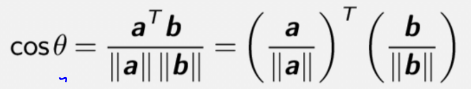

0.9087605037812038


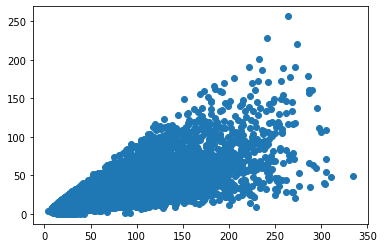

In [ ]:
import matplotlib.pyplot as plt

a = lines[0:,0]
b = lines[0:,1]

plt.scatter(a,b)

aTb = (np.dot(a,b))

anorm = np.linalg.norm(a)
bnorm = np.linalg.norm(b)

cosim = aTb / (anorm * bnorm)

print(cosim)

# Correlation between attribute 1 and attribute 2

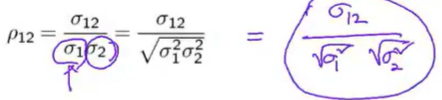

In [ ]:
# WHICH attribute has the highest variance?
# ANS: compare the diagonals of the covmat

maxcov = 0
i = 0
j = 0

for i in range(10):
  for j in range(10):
    if covmat[i][j] > maxcov:
      print('max found')
      maxcov = covmat[i][j]
      max_i = i
      max_j = j

print('maximum covariance is between variables', max_i ,' and ', max_j, ':', covmat[max_i][max_j])

max found
max found
max found
maximum covariance is between variables 9  and  9 : 5584.546352841385


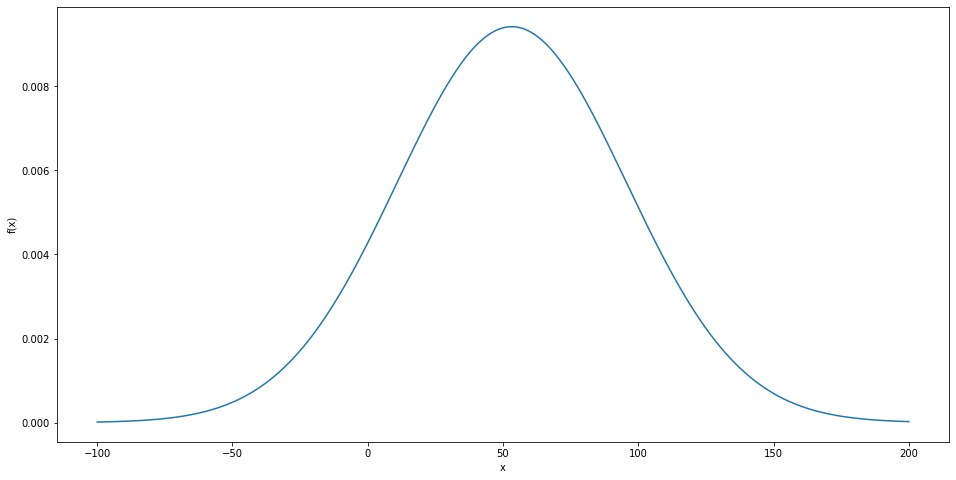

In [ ]:
# 5.	Assuming that Attribute 1 is normally distributed, plot its probability density function.

# finding mean and variance
atr1 = lines[:, 0]
mean = np.mean(atr1)
var = np.var(atr1)


# using the same univariate dist function as last time:
f_x = (1/np.sqrt(2*np.pi*var))*np.exp(-((x-mean)**2)/(2*var))
x = np.linspace(-100, 200, 500)

plt.figure(figsize=(16, 8)) 
plt.plot(x, f_x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()